In [1]:
import numpy as np
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt
from glob import glob

In [3]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [4]:
import cv2

def convolution_layer(X, weights, bias, strides, padding, name):
    with tf.name_scope(name):
        conv = tf.nn.conv2d(X, weights, strides=strides, padding=padding)
        conv = tf.nn.bias_add(conv, bias=bias)      
    return conv

In [5]:
def LeNet(X):
    mu = 0
    sigma = 0.1
    fc_1_in = 400
    fc_1_out = 120
    fc_2_out = 84
    
    weights = {
        'wc1': tf.Variable(tf.truncated_normal([5, 5, 3, 6], mean=mu, stddev = sigma)),
        'wc2': tf.Variable(tf.truncated_normal([5, 5, 6, 16], mean=mu, stddev = sigma)),
        'wfc1': tf.Variable(tf.truncated_normal([fc_1_in, fc_1_out], mean=mu, stddev = sigma)),
        'wfc2': tf.Variable(tf.truncated_normal([fc_1_out, fc_2_out], mean=mu, stddev = sigma)),
        'out': tf.Variable(tf.truncated_normal([fc_2_out, n_classes], mean=mu, stddev = sigma))
    }
    
    bias = {
        'bc1': tf.Variable(tf.zeros([6])),
        'bc2': tf.Variable(tf.zeros([16])),
        'bfc1': tf.Variable(tf.zeros([fc_1_out])),
        'bfc2': tf.Variable(tf.zeros([fc_2_out])),
        'out': tf.Variable(tf.zeros([n_classes]))
    }
    
    # Convolutional Network 1
    # [32, 32, 3] --> [28, 28, 6]
    conv_1 = tf.nn.conv2d(X, weights['wc1'], strides=[1, 1, 1, 1], padding='VALID')
    conv_1 = tf.nn.bias_add(conv_1, bias=bias['bc1'])
    
    # Activation Function
    # [28, 28, 6] --> [28, 28, 6]
    activate_2 = tf.nn.relu(conv_1)
    
    # pooling
    # [28, 28, 6] --> [14, 14, 6]
    pool_3 = tf.nn.max_pool(activate_2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Convolutional Network 2
    # [14, 14, 6] --> [10, 10, 6]
    conv_4 = tf.nn.conv2d(pool_3, weights['wc2'], strides=[1, 1, 1, 1], padding='VALID')
    conv_4 = tf.nn.bias_add(conv_4, bias=bias['bc2'])
    
    # Activation Function
    # [10, 10, 6] --> [5, 5, 16]
    activate_5 = tf.nn.relu(conv_4)
    
    # pooling
    # [5, 5, 16] --> [5, 5, 16]
    pool_6 = tf.nn.max_pool(activate_5, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Flatten
    # [5, 5, 16] --> fc_1_in
    flatten_7 = tf.contrib.layers.flatten(pool_6)
    
    # Fully connected layer 1
    # fc_1_in --> fc_1_out
    fc_8 = tf.add(tf.matmul(flatten_7, weights['wfc1']), bias['bfc1'])
    
    # Activation
    # fc_1_out --> fc_1_out
    activate_9 = tf.nn.relu(fc_8)
    
    # Dropout
    dropout_10 = tf.nn.dropout(activate_9, keep_prob=keep_prob)
    
    # Fully connected layer 2
    # fc_1_out --> fc_2_out
    fc_11 = tf.add(tf.matmul(dropout_10, weights['wfc2']), bias['bfc2'])
    
    # Activation
    # fc_2_out --> fc_2_out
    activate_12 = tf.nn.relu(fc_11)
    
    # Dropout
    dropout_13 = tf.nn.dropout(activate_12, keep_prob=keep_prob)
    
    # Fully connected layer 3
    logits = tf.add(tf.matmul(dropout_13, weights['out']), bias['out'])
    
    return logits    

In [6]:
training_path = 'dataset/training_set/'
# validation_path = 'dataset/test_set/'
test_path = 'dataset/test_set/'

In [7]:
classes = [cls.split('/')[-1] for cls in glob(training_path+ '*')]
print(classes)
n_classes = len(classes)
print(n_classes)

['dogs', 'cats']
2


In [8]:
training_data = glob(training_path + '*/*')
training_labels = [label_path.split('/')[-2] for label_path in training_data]

test_data = glob(test_path + '*/*')
test_labels = [label_path.split('/')[-2] for label_path in test_data]

In [9]:
a = np.array(['dogs','dogs','cats','cats','dogs'])

In [10]:
a[a=='dogs'] = 1

In [11]:
a

array(['1', '1', 'cats', 'cats', '1'], dtype='<U4')

In [12]:
a[a=='cats'] = 2

In [13]:
training_labels[:10]

['dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs',
 'dogs']

In [14]:
len(training_data), len(training_labels), len(test_data), len(test_labels)

(8000, 8000, 2000, 2000)

training_data = np.array(training_data)

training_data.shape

In [15]:
X_train, X_valid, Y_train, Y_valid = train_test_split(training_data, training_labels, test_size = 0.2)

In [16]:
X_train, Y_train = shuffle(X_train, Y_train)
X_valid, Y_valid = shuffle(X_valid, Y_valid)
X_test, Y_test = shuffle(test_data, test_labels)

In [17]:
len(X_test), len(Y_test)

(2000, 2000)

In [18]:
len(X_train), len(Y_train)

(6400, 6400)

In [19]:
len(X_valid), len(Y_valid)

(1600, 1600)

In [20]:
BATCH_SIZE = 16
IMAGE_W = 32
IMAGE_H = 32
CHANNELS = 3
LEARNING_RATE = 0.05
EPOCHS = 1

In [21]:
#grayscale
#To maintain the dimension of (32,32,1)
def rgb2gray(rgb):
    with tf.Session() as sess:
        data = tf.image.rgb_to_grayscale(rgb)
        data = data.eval(session=sess)
    return data

In [22]:
def normalize(x):
    x= x.astype(np.float32)
    return ((x - 128)/128)

In [23]:
% matplotlib inline


(375, 499, 3)


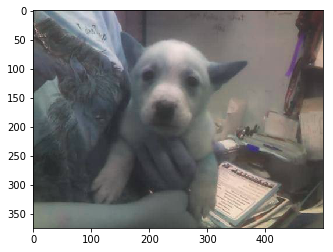

In [24]:
img = cv2.imread(X_train[0])
print(img.shape)
plt.imshow(img)


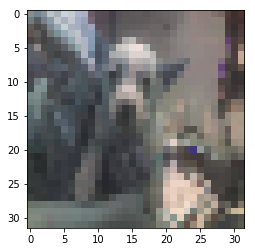

In [25]:
img = cv2.resize(img, (32,32))
plt.imshow(img)

with tf.Session() as sess:
    img_file = tf.read_file(training_data[0])
    img_decoded = tf.image.decode_image(img_file)
    img_decoded = img_decoded.eval(session=sess)
    print(img_decoded)

arrs = [cv2.resize(cv2.imread(X_train[i]),(32,32)) for i in range(20)]

res = np.concatenate([arr[np.newaxis] for arr in arrs])
res.shape

In [26]:
X_train[0]

'dataset/training_set/dogs/dog.464.jpg'

In [47]:
def file_to_tf_inputs(start, end):
    x = [cv2.resize(cv2.imread(X_train[i]), (IMAGE_W, IMAGE_H)) for i in range(start, end)]
    x = np.concatenate([arr[np.newaxis] for arr in x])
#     y = [Y_train[i] for i in range(start, end)]
    
    y = []
    for i in range(start, end):
        if Y_train[i] == 'dogs':
            y.append(1)
        else:
            y.append(2)
    
    return x, np.array(y)
    

In [28]:
x, y = file_to_tf_inputs(0,10)
x.shape

(10, 32, 32, 3)

In [29]:
y

array([1, 1, 2, 1, 1, 1, 1, 1, 2, 1])

In [30]:
class image_generator(object):
    def __init__(self, batch_size, input_data):
        self.index = 0
        self.batch_size = batch_size
        self.input_data = input_data
        self.data = 0
    
    def __iter__(self):
        return self
    
    def __next__(self):
        return next()
    
    def next(self):
        if self.index < self.input_data:
            x = X_train[self.index: self.index+self.batch_size]
            self.index += self.batch_size
            return x

In [31]:
train_generator = image_generator(10,30)

In [32]:
train_generator.next()

['dataset/training_set/dogs/dog.464.jpg',
 'dataset/training_set/dogs/dog.2677.jpg',
 'dataset/training_set/dogs/dog.1696.jpg',
 'dataset/training_set/cats/cat.2238.jpg',
 'dataset/training_set/dogs/dog.3149.jpg',
 'dataset/training_set/dogs/dog.2876.jpg',
 'dataset/training_set/cats/cat.1851.jpg',
 'dataset/training_set/cats/cat.2952.jpg',
 'dataset/training_set/cats/cat.3583.jpg',
 'dataset/training_set/cats/cat.2328.jpg']

In [33]:
def pre_process(data):
    gray_data = rgb2gray(data)
    return normalize(gray_data)

In [34]:
# PIPELINE

X = tf.placeholder(tf.float32, (None, IMAGE_W, IMAGE_H, CHANNELS))
Y = tf.placeholder(tf.int32, (None))
keep_prob = tf.placeholder(tf.float32)
y_true_one_hot = tf.one_hot(Y, n_classes)

logits = LeNet(X)
softmax = tf.nn.softmax(logits=logits)
softmax_cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=y_true_one_hot, logits=logits)
cost = tf.reduce_mean(softmax_cross_entropy)

optimizer = tf.train.AdamOptimizer(learning_rate= LEARNING_RATE)
training_operation = optimizer.minimize(cost)

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y_true_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

In [35]:
num_examples = len(X_train)

In [36]:
num_examples

6400

In [37]:
def validation_inputs():
    x = [cv2.resize(cv2.imread(X_valid[i]), (IMAGE_W, IMAGE_H)) for i in range(len(X_valid))]
    x = np.concatenate([arr[np.newaxis] for arr in x])
    
    y = []
    for i in range(len(Y_valid)):
        if Y_valid[i] == 'dogs':
            y.append(1)
        else:
            y.append(2)
#     y = [Y_valid[i] for i in range(len(Y_valid))]
    
    return x, np.array(y)

In [38]:
X_valid_np, Y_valid_np = validation_inputs()

In [39]:
X_valid_np.shape,Y_valid_np.shape

((1600, 32, 32, 3), (1600,))

In [40]:
Y_valid_np[1:10]

array([1, 2, 1, 1, 1, 1, 1, 2, 1])

In [55]:
def train(X_train, Y_train, X_valid_np, Y_valid_np):
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        
        print("=======================================================================")
        print("\t\t\t\tTRAINING\t\t\t\t")
        
        for epoch in range(EPOCHS):
            print("EPOCH: {}".format(epoch))
            for start in range(0, num_examples, BATCH_SIZE):
                X_train_batch, Y_train_batch = file_to_tf_inputs(start, start+BATCH_SIZE)
                sess.run(training_operation, feed_dict={X: X_train_batch,
                                                        Y: Y_train_batch, 
                                                        keep_prob: 0.5 })
            
            val_acc = sess.run(accuracy, feed_dict = {X: X_valid_np, 
                                                   Y: Y_valid_np, 
                                                   keep_prob:1})
            
            print("VAL ACCURACY : {}".format(val_acc))
            saver.save(sess, './model-dog-cat')

In [56]:
train(X_train, Y_train, X_valid_np, Y_valid_np)

				TRAINING				
EPOCH: 0
VAL ACCURACY : 0.4918749928474426


In [54]:
ls

Untitled.ipynb                     model-dog-cat.index
checkpoint                         model-dog-cat.meta
dataset/                           tf_intro.ipynb
model-dog-cat.data-00000-of-00001  tf_logistic_regression.ipynb
